# EDA

In [1]:
import pandas as pd, numpy as np
import pathlib, codecs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
# import japanize_matplotlib
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.rcParams['font.sans-serif']='MS Mincho'
%matplotlib inline

In [61]:
# Showing description of columns
pd.read_excel('about the data.xlsx')

,item,項目,Notes
0,sex_cd,性別,1: Male\n2: Female
1,age,年代,NaN
2,family_cd,家族区分,NaN
3,household_cd,住居区分,NaN
4,salary_cd,年収区分,NaN
5,occupation_cd,業界・職業区分,Based on Industrial category defined by JP Gov...
6,home_prefecture_cd,自宅都道府県コード,https://en.wikipedia.org/wiki/ISO_3166-2:JP
7,work_pref_same_as_home_flg,勤務先都道府県と居住府県が同一フラグ,NaN
8,transaction_date,売上年月日,NaN
9,cashing_sum,キャッシング利用金額合計,NaN


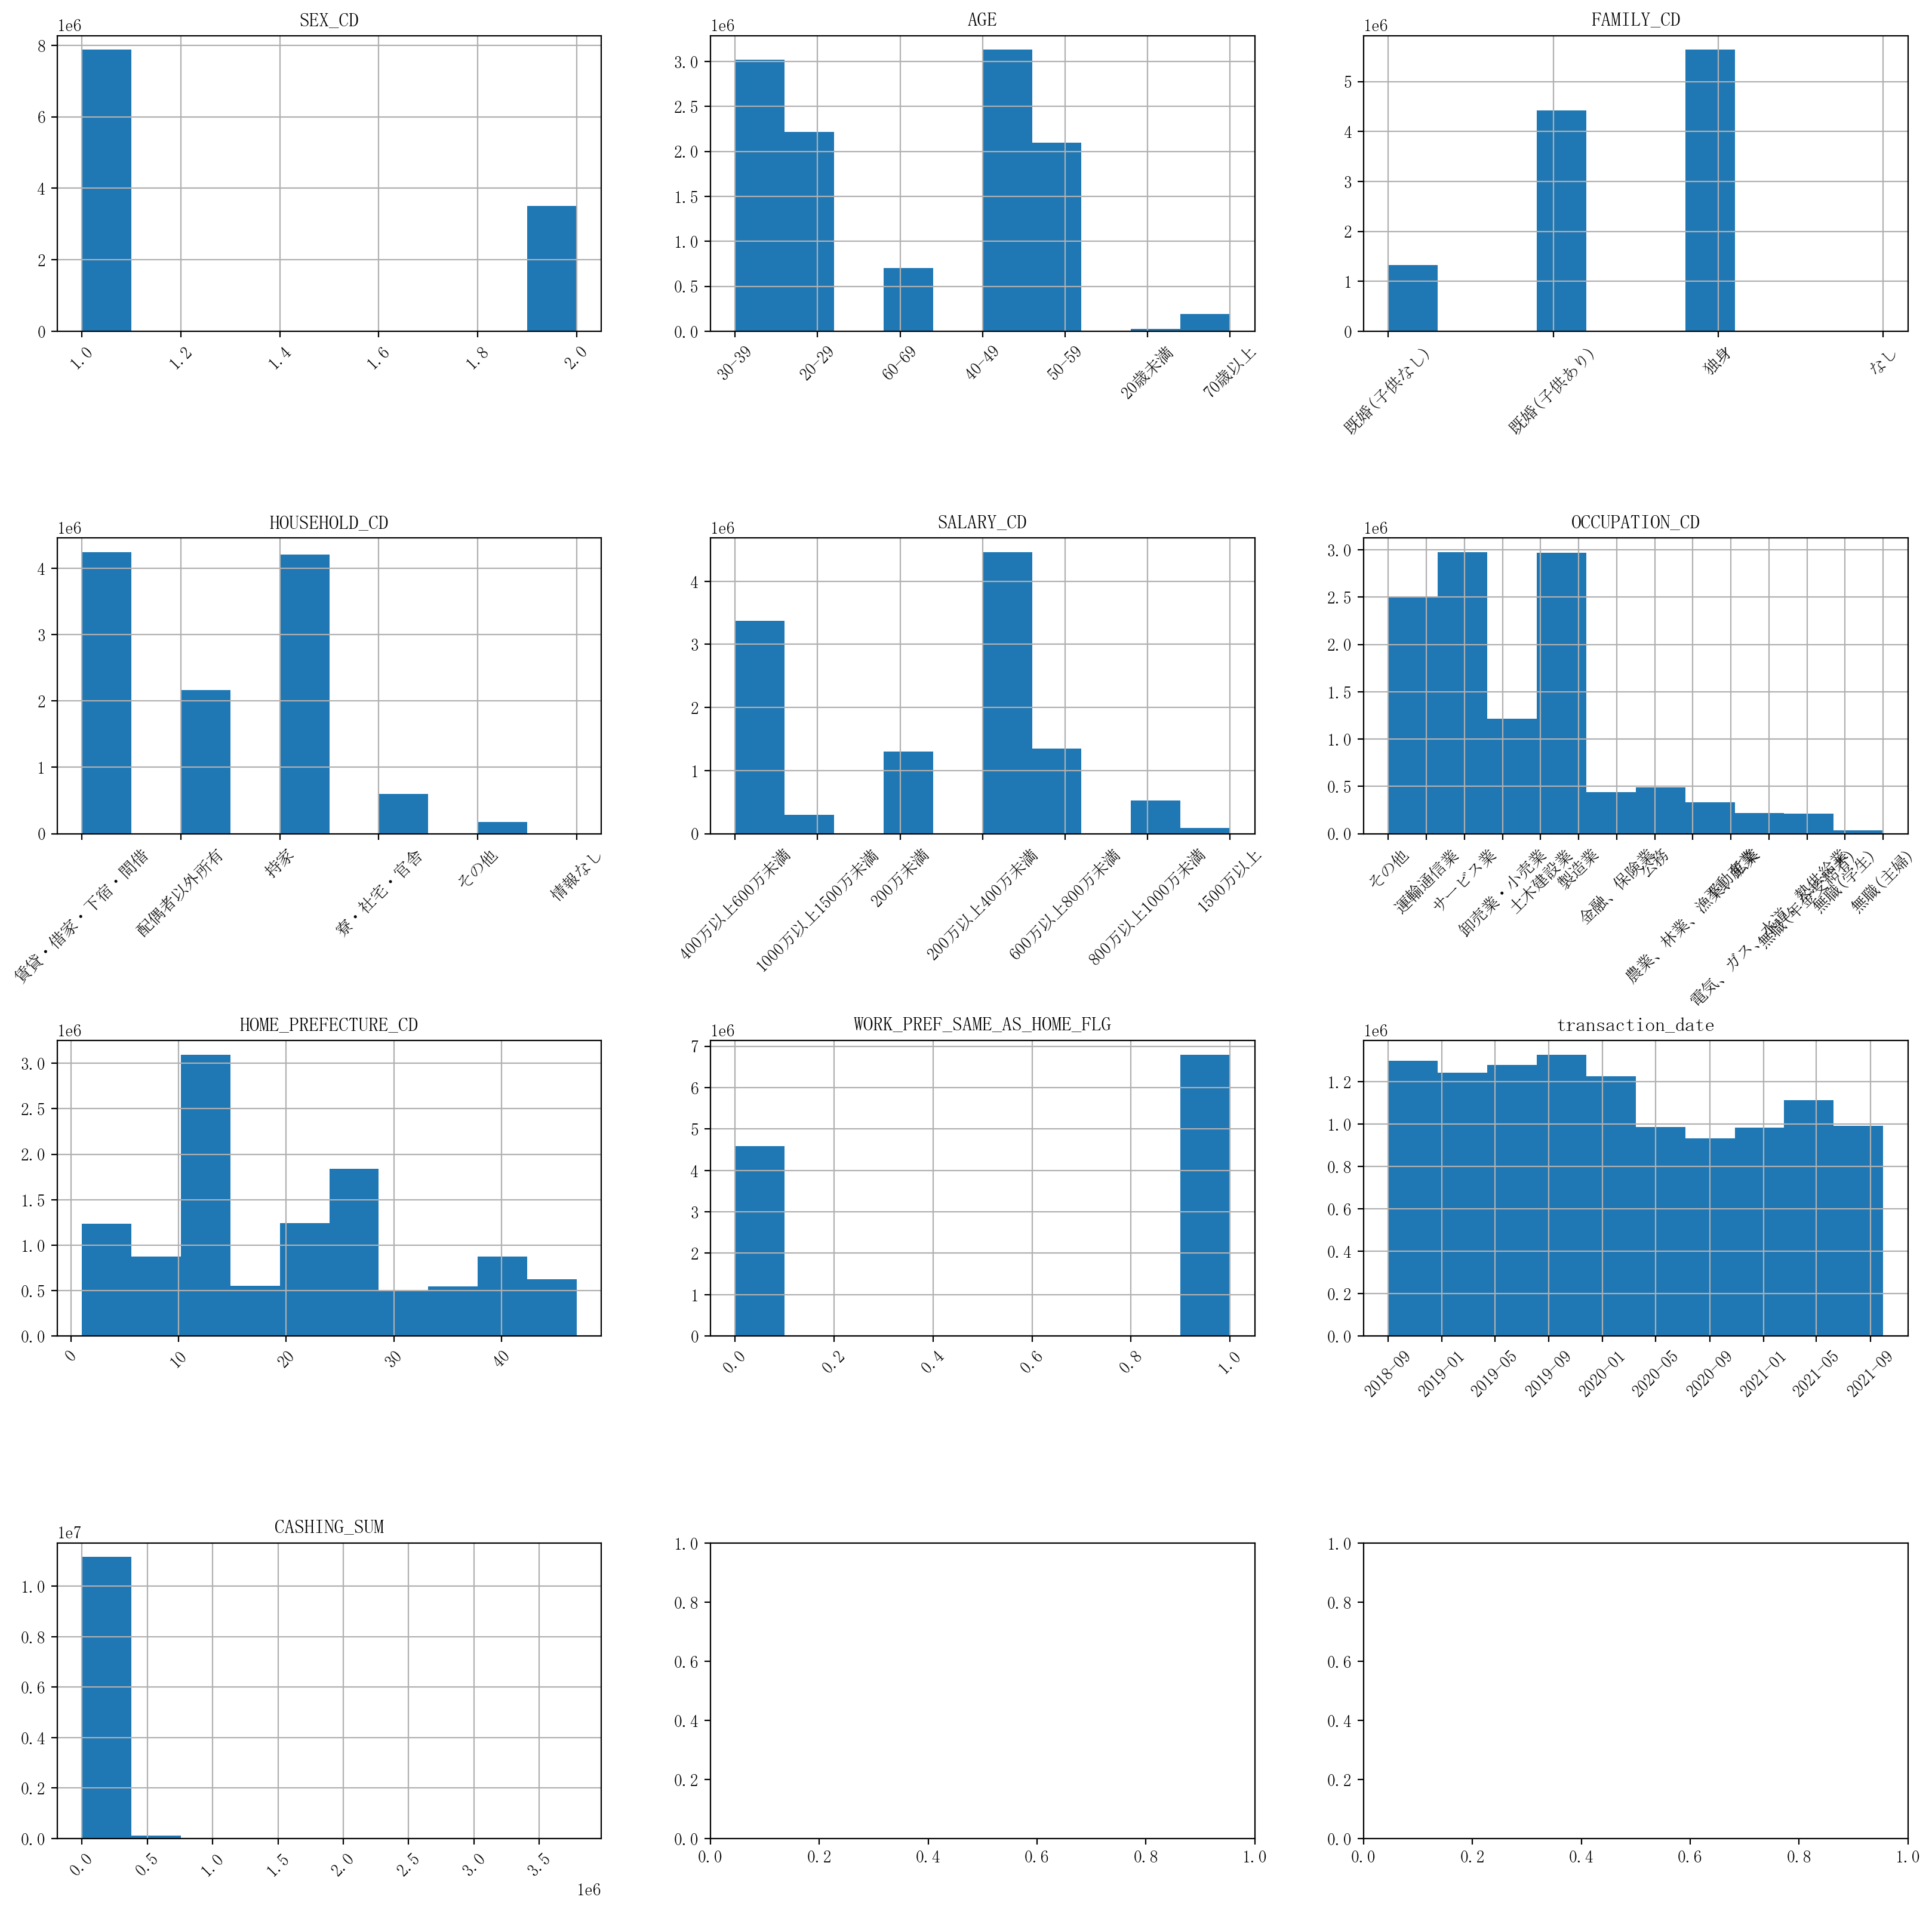

In [30]:
ncols = 3
nrows = len(data.columns)//ncols + 1
plt.subplots(nrows, ncols, figsize=(20,20),dpi=200)
for i,col in enumerate(data.columns):
    plt.subplot(nrows,ncols,i+1)
    data[col].dropna().hist()
    plt.title(col)
    plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.7)

In [4]:
salary_ = data.loc[:,['SALARY_CD','CASHING_SUM']]

In [30]:
salary_.groupby('SALARY_CD').mean()

,CASHING_SUM
SALARY_CD,
1000万以上1500万未満,64526.921568
1500万以上,77497.661973
200万以上400万未満,46087.988468
200万未満,35971.419807
400万以上600万未満,50172.501169
600万以上800万未満,53663.244960
800万以上1000万未満,55775.584567


In [25]:
salary_.SALARY_CD.value_counts()

200万以上400万未満      4437131
400万以上600万未満      3353426
600万以上800万未満      1326712
200万未満            1281628
800万以上1000万未満      505557
1000万以上1500万未満     286668
1500万以上             79751
Name: SALARY_CD, dtype: int64

## Time Series Analyze

## group_by_days

In [2]:
data = pd.read_csv('data.csv')

In [3]:
sum_dayly = data.groupby(data.transaction_date).sum()
Cash_sum_dayly = sum_dayly.CASHING_SUM/1000

C:\Users\yukino\AppData\Local\Temp/ipykernel_8816/991566177.py:34: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  plot_periodogram(Cash_sum_dayly)


<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

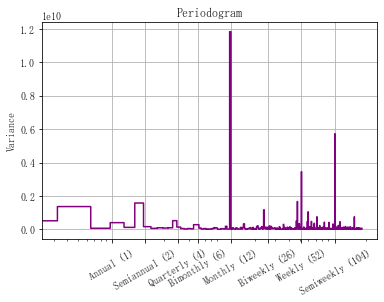

In [5]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    plt.grid()
    return ax
plot_periodogram(Cash_sum_dayly)

<AxesSubplot:xlabel='transaction_date'>

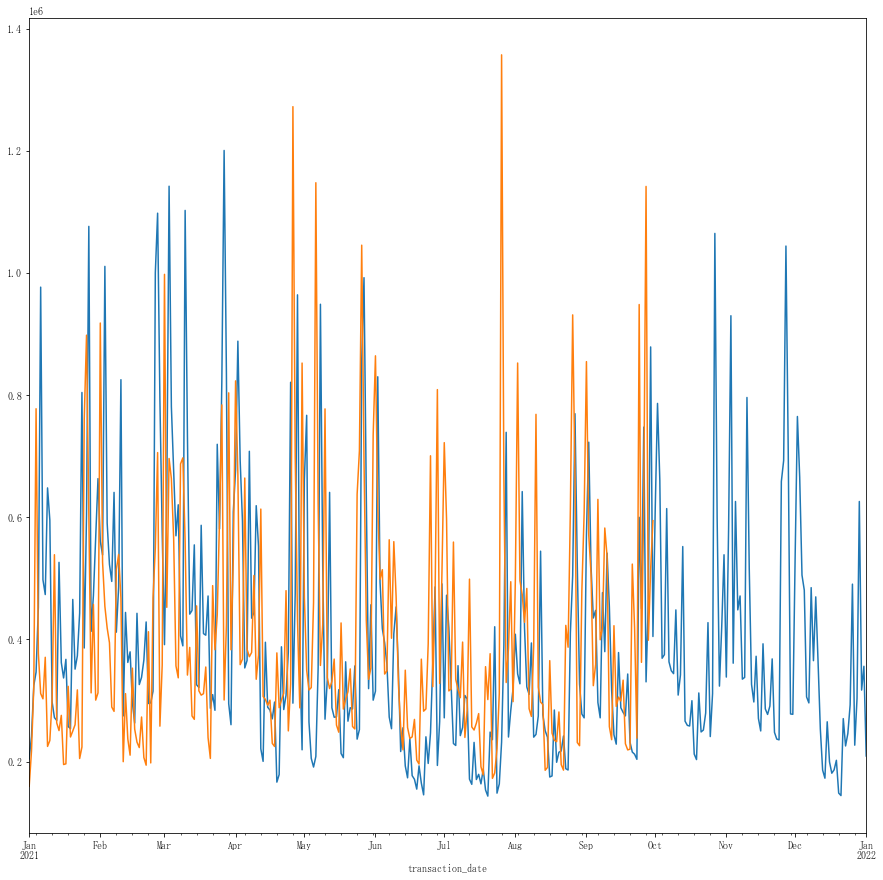

In [132]:
Cash_sum_dayly.index = pd.to_datetime(Cash_sum_dayly.index)
Cash_sum_dayly['2020'].shift(366,freq='D').plot()
Cash_sum_dayly['2021'].plot()

<AxesSubplot:xlabel='transaction_date'>

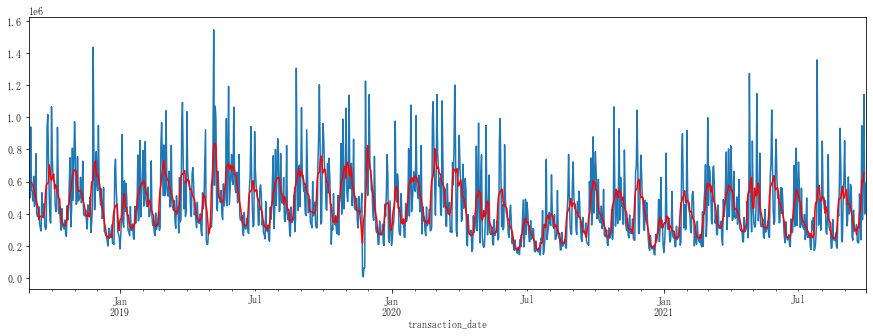

In [17]:
rolling = Cash_sum_dayly.rolling(window=7,center=True)
rolling_mean = rolling.mean()
Cash_sum_dayly.plot(figsize=(15, 5))
rolling_mean.plot(figsize=(15, 5), color='red')

In [19]:
import statsmodels.api as sm

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


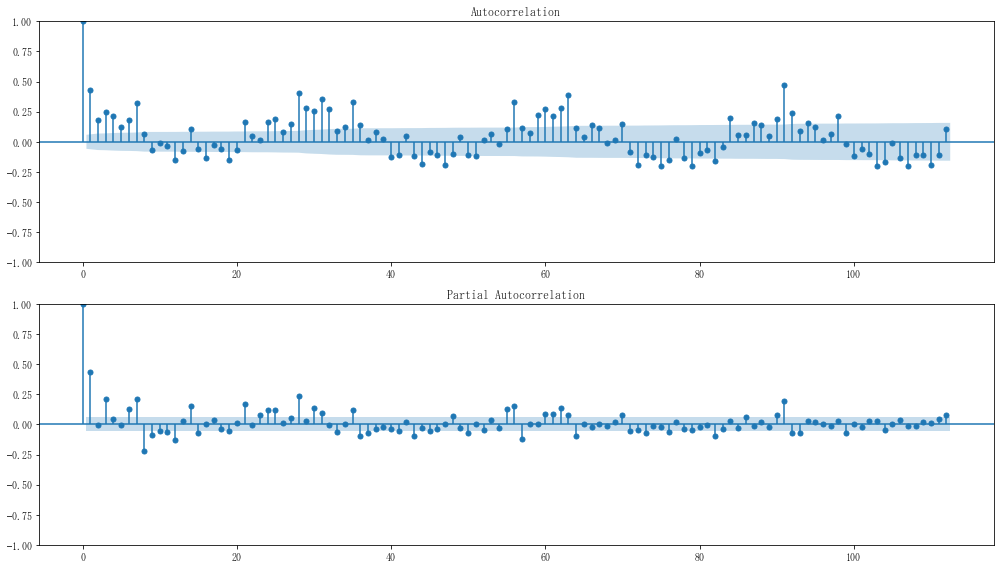

In [29]:
fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(Cash_sum_dayly, lags=7*16, ax=ax1)

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(Cash_sum_dayly, lags=7*16, ax=ax2)
# plt.show()
plt.tight_layout()

**Showing a clear periodicity: weekly periodicity**

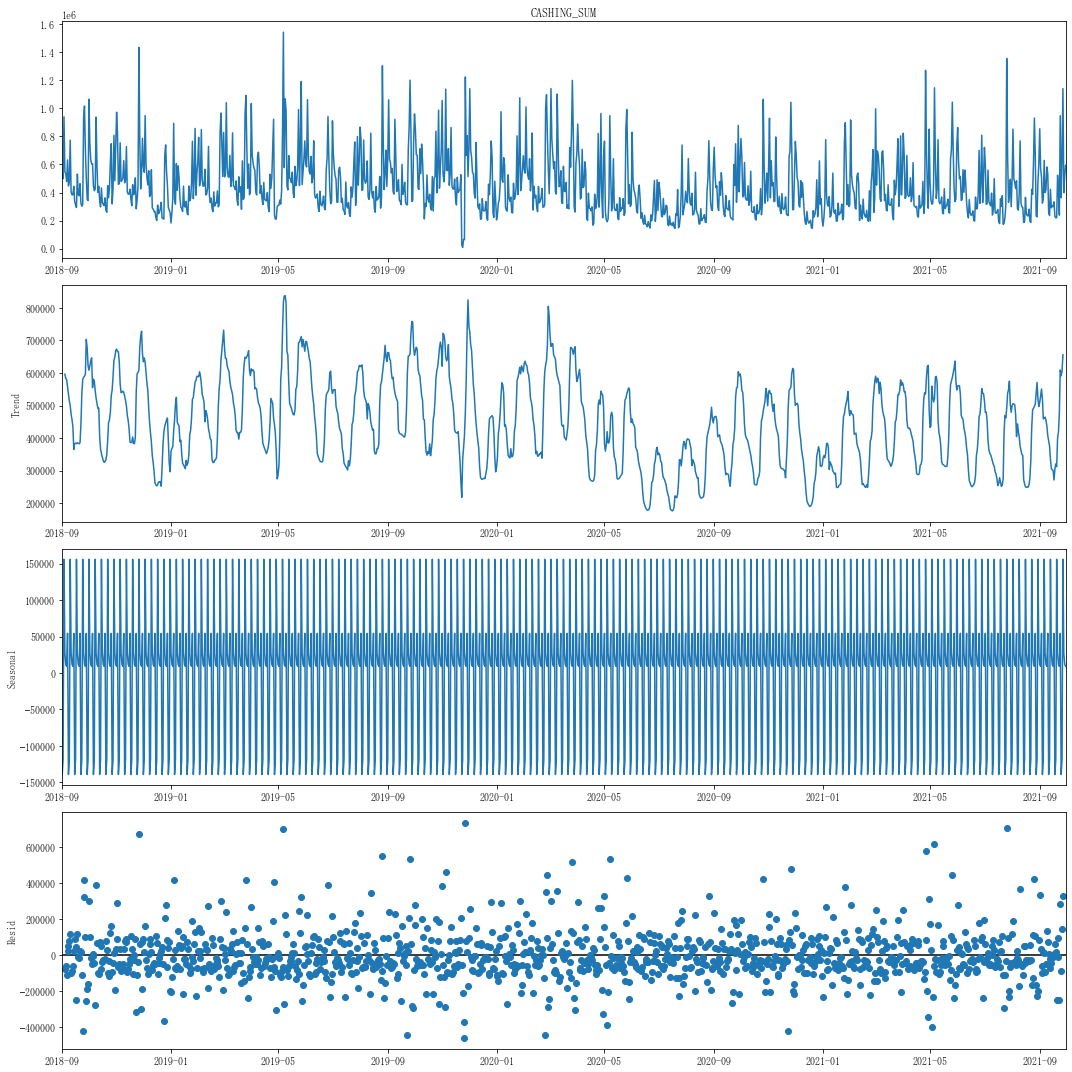

In [58]:
plt.rcParams.update({'figure.figsize':(15, 15)})
result = sm.tsa.seasonal_decompose(Cash_sum_dayly, model='additive', period=7)
result.plot()
plt.show()

In [25]:
salary_.SALARY_CD.value_counts()

200万以上400万未満      4437131
400万以上600万未満      3353426
600万以上800万未満      1326712
200万未満            1281628
800万以上1000万未満      505557
1000万以上1500万未満     286668
1500万以上             79751
Name: SALARY_CD, dtype: int64

# Preprocessing

In [4]:
# import requests
# import json
# corona = requests.get("https://data.corona.go.jp/converted-json/covid19japan-npatients.json").text
# corona = pd.DataFrame(json.loads(corona)).drop('npatients',axis=1)
# corona.date = pd.to_datetime(corona.date)
# corona = corona.set_index('date')
# word = pd.read_csv('word.csv',parse_dates=['日付'],index_col=0)
# word = word.loc[:,'緊急事態宣言']
data=pd.read_csv('data.csv',
                 index_col=0,
                 parse_dates=["transaction_date"])

In [3]:
data = data.dropna()
data = data.sort_values('transaction_date')
# data = data.set_index('transaction_date')

In [4]:
data.CASHING_SUM.quantile([.05,.01,.9,.95,.98,.995,.999,1])

0.050      10000.0
0.010      10000.0
0.900     100000.0
0.950     180000.0
0.980     300000.0
0.995     500000.0
0.999     660000.0
1.000    3785802.0
Name: CASHING_SUM, dtype: float64

In [17]:
(data.CASHING_SUM<10000.0).sum()/data.shape[0]

0.007096610883646724

In [31]:
(data.CASHING_SUM>500000.0).sum()/data.shape[0]

0.0027865632058847616

In [4]:
# drop outliers， you can also reserve it
data_n = data[data.CASHING_SUM>=10000.0]
data_n = data_n[data_n.CASHING_SUM<500000.0]

In [8]:
data_n

,SEX_CD,AGE,FAMILY_CD,HOUSEHOLD_CD,SALARY_CD,OCCUPATION_CD,HOME_PREFECTURE_CD,WORK_PREF_SAME_AS_HOME_FLG,transaction_date,CASHING_SUM
103924,1.0,40-49,既婚(子供なし),持家,200万以上400万未満,製造業,36.0,0.0,2018-09-01,30000.0
144237,1.0,30-39,独身,持家,200万以上400万未満,電気、ガス、水道、熱供給業,19.0,1.0,2018-09-01,20000.0
144247,1.0,50-59,既婚(子供あり),配偶者以外所有,600万以上800万未満,サービス業,13.0,1.0,2018-09-01,40000.0
323645,1.0,20-29,独身,賃貸・借家・下宿・間借,400万以上600万未満,サービス業,14.0,0.0,2018-09-01,160000.0
279552,2.0,40-49,既婚(子供あり),持家,200万未満,その他,42.0,0.0,2018-09-01,30000.0
...,...,...,...,...,...,...,...,...,...,...
63417,1.0,50-59,既婚(子供あり),持家,400万以上600万未満,金融、保険業,15.0,1.0,2021-09-30,30000.0
273499,2.0,40-49,既婚(子供あり),配偶者以外所有,200万以上400万未満,製造業,40.0,1.0,2021-09-30,20000.0
208762,1.0,50-59,既婚(子供あり),持家,800万以上1000万未満,製造業,14.0,1.0,2021-09-30,10000.0
208912,2.0,30-39,既婚(子供あり),持家,200万以上400万未満,製造業,27.0,1.0,2021-09-30,20000.0


In [5]:
def transform_one_hot(data, col):
    enc = OneHotEncoder().fit(np.array(data[col]).reshape(-1,1)) # 可输入多列
    result = enc.transform(np.array(data[col]).reshape(-1,1)).toarray()
    data = data.drop(col,axis=1)
    new_col = pd.DataFrame(result,columns=[i.replace('x0_','') for i in enc.get_feature_names_out()])
    new_col.index = data.index
    if 'なし' in new_col.columns:
        new_col.drop('なし',axis=1,inplace=True)
    return pd.concat([new_col,data],axis=1)

In [6]:
for col_name in ['FAMILY_CD', 'HOUSEHOLD_CD', 'OCCUPATION_CD']:
    data_n = transform_one_hot(data_n, col_name)

In [7]:
data_n

,その他,サービス業,不動産業,公務,卸売業・小売業,土木建設業,無職(主婦),無職(学生),無職(年金受給者),製造業,...,既婚(子供あり),既婚(子供なし),独身,SEX_CD,AGE,SALARY_CD,HOME_PREFECTURE_CD,WORK_PREF_SAME_AS_HOME_FLG,transaction_date,CASHING_SUM
103924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,40-49,200万以上400万未満,36.0,0.0,2018-09-01,30000.0
144237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,30-39,200万以上400万未満,19.0,1.0,2018-09-01,20000.0
144247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,50-59,600万以上800万未満,13.0,1.0,2018-09-01,40000.0
323645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,20-29,400万以上600万未満,14.0,0.0,2018-09-01,160000.0
279552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,40-49,200万未満,42.0,0.0,2018-09-01,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,50-59,400万以上600万未満,15.0,1.0,2021-09-30,30000.0
273499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,2.0,40-49,200万以上400万未満,40.0,1.0,2021-09-30,20000.0
208762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,50-59,800万以上1000万未満,14.0,1.0,2021-09-30,10000.0
208912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,2.0,30-39,200万以上400万未満,27.0,1.0,2021-09-30,20000.0


In [8]:
data_n.AGE.drop_duplicates()

103924    40-49
144237    30-39
144247    50-59
323645    20-29
144144    60-69
221895    70歳以上
279787    20歳未満
Name: AGE, dtype: object

In [7]:
Age = ['20歳未満','20-29','30-39','40-49','50-59','60-69','70歳以上']

In [8]:
data_n['AGE'] = data_n['AGE'].apply(lambda i:(Age.index(i)*10)+15)

In [114]:
data_n.SALARY_CD.drop_duplicates()

103924      200万以上400万未満
144247      600万以上800万未満
323645      400万以上600万未満
279552            200万未満
144222     800万以上1000万未満
323961    1000万以上1500万未満
221823           1500万以上
Name: SALARY_CD, dtype: object

In [9]:
Salary = ['200万未満','200万以上400万未満','400万以上600万未満','600万以上800万未満','800万以上1000万未満','1000万以上1500万未満','1500万以上']
data_n['SALARY_CD'] = data_n['SALARY_CD'].apply(lambda i:(Salary.index(i)*200)+100)

In [13]:
data_n.index = np.arange(data_n.shape[0])
# data_n.to_csv('processed_data.csv')